---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

*Note: Some of the cells in this notebook are computationally expensive. To reduce runtime, this notebook is using a subset of the data.*

# Case Study: Sentiment Analysis

### Data Prep

In [1]:
friends_chars={} 
Rachel=[]
Ross=[]
Joey=[]
Chandler=[]
Phoebe=[]
Monica=[]
with open("transcripts_friends/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        #print("Line {}: {}".format(cnt, line))
        if line.startswith('Rachel:'):
            Rachel.append(line[8:])
        elif line.startswith('Ross:'):
            Ross.append(line[6:])
        elif line.startswith('Monica:'):
            Monica.append(line[8:])
        elif line.startswith('Chandler:'):
            Chandler.append(line[10:])
        if line.startswith('Phoebe:'):
            Phoebe.append(line[8:])
        if line.startswith('Joey:'):
            Joey.append(line[6:])

friends_chars['RACHEL']=Rachel
friends_chars['ROSS']=Ross
friends_chars['MONICA']=Monica
friends_chars['PHOEBE']=Phoebe
friends_chars['CHANDLER']=Chandler
friends_chars['JOEY']=Joey



In [2]:
import pandas as pd

df1 = pd.DataFrame(friends_chars['CHANDLER'])
df2 = pd.DataFrame(friends_chars['JOEY'])
df3 = pd.DataFrame(friends_chars['PHOEBE'])
df4 = pd.DataFrame(friends_chars['RACHEL'])
df5 = pd.DataFrame(friends_chars['ROSS'])
df6 = pd.DataFrame(friends_chars['MONICA'])

In [3]:
pd.options.display.max_colwidth = 100

In [4]:
df1.head()

,0
0,"You know, I'd love to, but I'm a little tired.\n"
1,You're on!\n
2,"He could be alone. This morning I heard him do push-ups, and then talk to his triceps.\n"
3,She's cheating on Joey with Ross!\n
4,Wow!\n


In [5]:
listOfCharacters1 = [False] *df1.shape[0]
listOfCharacters2 = [False] *df2.shape[0]
listOfCharacters3 = [True] *df3.shape[0]
listOfCharacters4 = [False] *df4.shape[0]
listOfCharacters5 = [False] *df5.shape[0]
listOfCharacters6 = [False] *df6.shape[0]


In [6]:
df1['Phoebe'] = listOfCharacters1
df2['Phoebe'] = listOfCharacters2 
df3['Phoebe'] = listOfCharacters3
df4['Phoebe'] = listOfCharacters4
df5['Phoebe'] = listOfCharacters5
df6['Phoebe'] = listOfCharacters6


In [7]:
df1=df1.rename(columns={0: 'Dialogue'})
df2=df2.rename(columns={0: 'Dialogue'})
df3=df3.rename(columns={0: 'Dialogue'})
df4=df4.rename(columns={0: 'Dialogue'})
df5=df5.rename(columns={0: 'Dialogue'})
df6=df6.rename(columns={0: 'Dialogue'})

In [8]:
df = pd.concat([df1, df2,df3,df4,df5,df6])
df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Dialogue,Phoebe
0,She sent the chicken back again?!\n,False
1,"Sorry, I just uhm... I can't seem to get Ross out of my head...\n",False
2,"I say ‘cheesy line’, but ok.\n",False
3,"If you wanna get back in the car, we need the wire, your call.\n",False
4,"This isn't easy for me either. I wish things were different, I... If you were a few years older,...",False


In [9]:
df.head(10)

,Dialogue,Phoebe
0,She sent the chicken back again?!\n,False
1,"Sorry, I just uhm... I can't seem to get Ross out of my head...\n",False
2,"I say ‘cheesy line’, but ok.\n",False
3,"If you wanna get back in the car, we need the wire, your call.\n",False
4,"This isn't easy for me either. I wish things were different, I... If you were a few years older,...",False
5,Emma? Hey! Hi!\n,False
6,So I guess you all saw it.\n,False
7,"No, I’m genuinely sorry the Mark thing didn’t work out. Look, Rach, I want only good things for ...",False
8,"Oh, because we love kids. Love ‘em to death.Well, not actually to death, that's just a figure of...",False
9,"You can't have S-E-X, when you're taking care of the B-A-B-I-E!\n",False


In [10]:
from io import StringIO
col = [ 'Dialogue','Phoebe']
df = df[col]
df = df[pd.notnull(df['Dialogue'])]
df.columns = ['Dialogue', 'Phoebe']
category_id_df = df[['Dialogue', 'Phoebe']]
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Phoebe', 'Dialogue']].values)
df.head(10)


,Dialogue,Phoebe
0,She sent the chicken back again?!\n,False
1,"Sorry, I just uhm... I can't seem to get Ross out of my head...\n",False
2,"I say ‘cheesy line’, but ok.\n",False
3,"If you wanna get back in the car, we need the wire, your call.\n",False
4,"This isn't easy for me either. I wish things were different, I... If you were a few years older,...",False
5,Emma? Hey! Hi!\n,False
6,So I guess you all saw it.\n,False
7,"No, I’m genuinely sorry the Mark thing didn’t work out. Look, Rach, I want only good things for ...",False
8,"Oh, because we love kids. Love ‘em to death.Well, not actually to death, that's just a figure of...",False
9,"You can't have S-E-X, when you're taking care of the B-A-B-I-E!\n",False


In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


In [12]:
import re
from nltk.corpus import stopwords


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Dialogue'] = df['Dialogue'].apply(clean_text)
df['Dialogue'] = df['Dialogue'].str.replace('\d+', '')
df.head()

,Dialogue,Phoebe
0,sent chicken back,False
1,sorry uhm cant seem get ross head,False
2,say cheesy line ok,False
3,wanna get back car need wire call,False
4,isnt easy either wish things different years older years younger lived biblical times would really,False


In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [14]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 64
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df1['Dialogue'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index

Found 6637 unique tokens.


{'\n': 1,
 'i': 2,
 'you': 3,
 'the': 4,
 'to': 5,
 'a': 6,
 'and': 7,
 'that': 8,
 'it': 9,
 'what': 10,
 'of': 11,
 'is': 12,
 'no': 13,
 'in': 14,
 'oh': 15,
 'this': 16,
 'me': 17,
 'we': 18,
 'okay': 19,
 'so': 20,
 'just': 21,
 'not': 22,
 'have': 23,
 'do': 24,
 'my': 25,
 'with': 26,
 'was': 27,
 'on': 28,
 'he': 29,
 'know': 30,
 'well': 31,
 'for': 32,
 'all': 33,
 'yeah': 34,
 'be': 35,
 'her': 36,
 'are': 37,
 'but': 38,
 'hey': 39,
 'right': 40,
 'at': 41,
 'up': 42,
 'out': 43,
 'get': 44,
 'like': 45,
 "i'm": 46,
 'your': 47,
 'gonna': 48,
 'can': 49,
 'i’m': 50,
 'monica': 51,
 'him': 52,
 'joey': 53,
 'if': 54,
 'think': 55,
 'about': 56,
 'go': 57,
 'look': 58,
 'here': 59,
 'his': 60,
 'she': 61,
 'really': 62,
 'don’t': 63,
 "it's": 64,
 'one': 65,
 'ross': 66,
 'did': 67,
 'they': 68,
 'it’s': 69,
 "don't": 70,
 'there': 71,
 'now': 72,
 'yes': 73,
 'uh': 74,
 'see': 75,
 'why': 76,
 'mean': 77,
 'how': 78,
 'got': 79,
 'good': 80,
 'because': 81,
 'when': 82,
 "th

In [15]:
X = tokenizer.texts_to_sequences(df['Dialogue'].values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (99233, 120)


array([[   0,    0,    0, ..., 1468,  707,   90],
       [   0,    0,    0, ...,   44,   66,  249],
       [   0,    0,    0, ...,   84,  577,  163],
       ...,
       [   0,    0,    0, ...,    0,    0,  109],
       [   0,    0,    0, ..., 3600,   58,  389],
       [   0,    0,    0, ...,  544,  962,  193]], dtype=int32)

In [16]:
Y = pd.get_dummies(df['Phoebe']).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
Y

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(66486, 120) (66486, 2)
(32747, 120) (32747, 2)


In [18]:
X_test

array([[   0,    0,    0, ...,    0,   15,   19],
       [   0,    0,    0, ...,    0,    0,   39],
       [   0,    0,    0, ...,    0,    0, 1325],
       ...,
       [   0,    0,    0, ...,   48,   57,  889],
       [   0,    0,    0, ...,    0,    0,   39],
       [   0,    0,    0, ...,  146,  371,   40]], dtype=int32)

In [19]:
Y_test


array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [20]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [21]:
X.shape[1]

120

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(tf.keras.layers.SpatialDropout1D(0.2))
model1.add(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model1.add(tf.keras.layers.Dense(2, activation='softmax'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

W1102 11:06:55.746277 4435885504 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 59837 samples, validate on 6649 samples
Epoch 1/10
59837/59837 [==============================] - 70s 1ms/sample - loss: 0.4068 - accuracy: 0.8535 - val_loss: 0.3828 - val_accuracy: 0.8604
Epoch 2/10
59837/59837 [==============================] - 68s 1ms/sample - loss: 0.3678 - accuracy: 0.8612 - val_loss: 0.3761 - val_accuracy: 0.8648
Epoch 3/10
59837/59837 [==============================] - 66s 1ms/sample - loss: 0.3446 - accuracy: 0.8678 - val_loss: 0.3708 - val_accuracy: 0.8663
Epoch 4/10
59837/59837 [==============================] - 68s 1ms/sample - loss: 0.3287 - accuracy: 0.8747 - val_loss: 0.3751 - val_accuracy: 0.8655
Epoch 5/10
59837/59837 [==============================] - 76s 1ms/sample - loss: 0.3144 - accuracy: 0.8810 - val_loss: 0.3782 - val_accuracy: 0.8672
Epoch 6/10
59837/59837 [==============================] - 67s 1ms/sample - loss: 0.3018 - accuracy: 0.8848 - val_loss: 0.3877 - val_accuracy: 0.8661


In [38]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 59837 samples, validate on 6649 samples
Epoch 1/10
59837/59837 [==============================] - 169s 3ms/sample - loss: 0.4065 - accuracy: 0.8547 - val_loss: 0.3869 - val_accuracy: 0.8555
Epoch 2/10
59837/59837 [==============================] - 167s 3ms/sample - loss: 0.3597 - accuracy: 0.8642 - val_loss: 0.3761 - val_accuracy: 0.8582
Epoch 3/10
59837/59837 [==============================] - 163s 3ms/sample - loss: 0.3281 - accuracy: 0.8754 - val_loss: 0.3672 - val_accuracy: 0.8630
Epoch 4/10
59837/59837 [==============================] - 160s 3ms/sample - loss: 0.3018 - accuracy: 0.8854 - val_loss: 0.3705 - val_accuracy: 0.8676
Epoch 5/10
59837/59837 [==============================] - 164s 3ms/sample - loss: 0.2795 - accuracy: 0.8951 - val_loss: 0.3691 - val_accuracy: 0.8714
Epoch 6/10
59837/59837 [==============================] - 163s 3ms/sample - loss: 0.2622 - accuracy: 0.9012 - val_loss: 0.3810 - val_accuracy: 0.8722


In [23]:
accr = model1.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32747/32747 [==============================] - 24s 745us/sample - loss: 0.3722 - accuracy: 0.8634
Test set
  Loss: 0.372
  Accuracy: 0.863


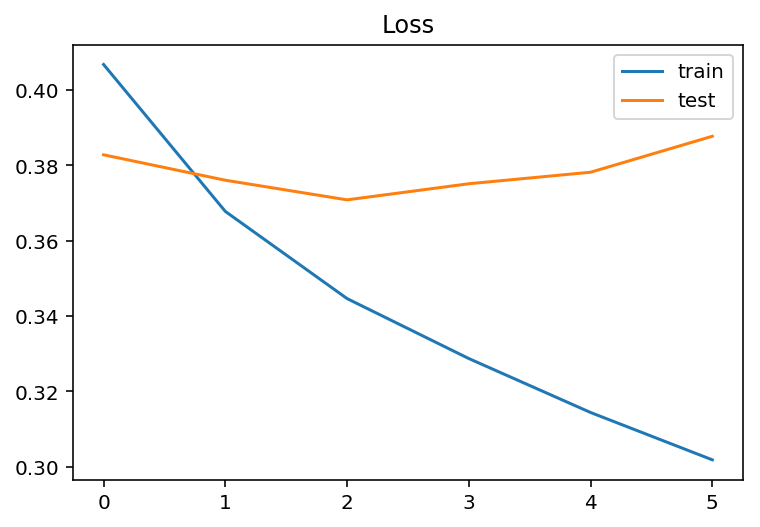

In [24]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [25]:
#model = LinearSVC()
#X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
#"model.fit(X_train, y_train)
# X_test = X_test.reshape(X_test.shape[1:])
# X_test=X_test.transpose()
y_pred = model1.predict(X_test)
y_pred



array([[0.75159544, 0.24840458],
       [0.78685427, 0.21314572],
       [0.42812037, 0.5718796 ],
       ...,
       [0.9797356 , 0.02026435],
       [0.78685427, 0.21314572],
       [0.9982492 , 0.00175089]], dtype=float32)

In [26]:
Y_test



array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [27]:
import numpy as np
probas = np.array(y_pred)
y_pred = np.argmax(probas, axis=-1)    
print(y_pred)

[0 0 1 ... 0 0 0]


In [28]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[0 0 1 ... 0 0 0]


In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Y_test, y_pred)



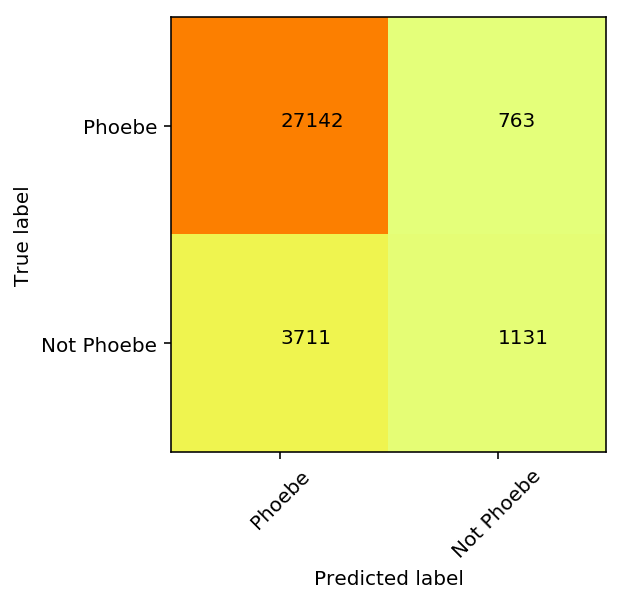

In [30]:
plt.clf()
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Phoebe','Not Phoebe']
#plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(conf_mat[i][j]))
plt.show()

In [32]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Phoebe', 'Not Phoebe']
print(classification_report(y_true, y_pred, target_names=target_names))
     

              precision    recall  f1-score   support

      Phoebe       0.88      0.97      0.92     27905
  Not Phoebe       0.60      0.23      0.34      4842

    accuracy                           0.86     32747
   macro avg       0.74      0.60      0.63     32747
weighted avg       0.84      0.86      0.84     32747



In [ ]:
from sklearn.metrics import classification_report
y_true = Y_test
target_names = ['Phoebe', 'Not Phoebe']
print(classification_report(y_true, y_pred, target_names=target_names))
     

In [55]:
X_train

array([[   0,    0,    0, ...,   15,  209, 2390],
       [   0,    0,    0, ..., 1755,   86,  373],
       [   0,    0,    0, ...,  834,   88,   75],
       ...,
       [   0,    0,    0, ...,  504,  109,  284],
       [   0,    0,    0, ...,  999,  233,   74],
       [   0,    0,    0, ...,   40,   48,   40]], dtype=int32)

In [57]:
Y_train = np.array(Y_train)
Y_train = np.argmax(Y_train, axis=-1)    
print(Y_train)

[0 0 0 ... 0 0 0]


In [58]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
#print(clf.predict(X[2:3]))



BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [66]:
y_pred1=clf.predict(X_test)